<center><h1> Diabetes Prediction using Machine Learning Algorithm </h1> </center>

<h3>Importing Libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Loading Dataset and E.D.A. </h3>
<br>
Dataset is collected from kaggle.<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<strong>Calculating all the null values in the column.</strong>

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h3> Here, We are finding the correlation among the columns.

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<h3> Data Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

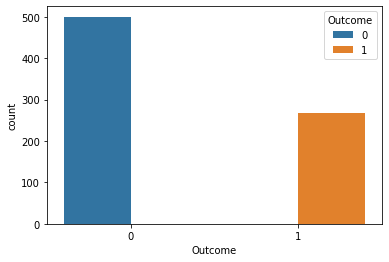

In [6]:
sns.countplot(x='Outcome', data = df, hue="Outcome")

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


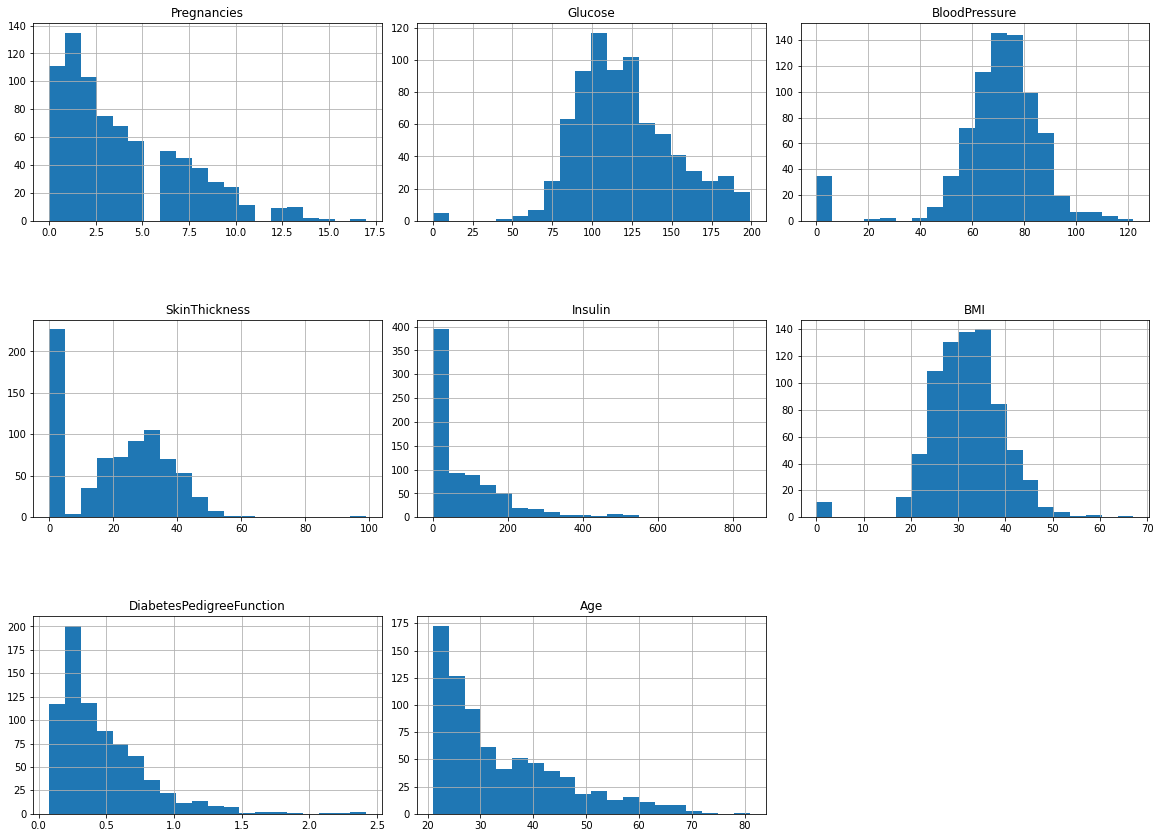

In [7]:
import itertools

col = df.columns[:8]
plt.subplots(figsize= (20,20))
length = len(col)

for i,j in itertools.zip_longest(col , range(length)):
    plt.subplot((length/2), 3 , j+1)
    plt.subplots_adjust(wspace = 0.1 , hspace = 0.5)
    df[i].hist(bins=20)
    plt.title(i)
plt.show()


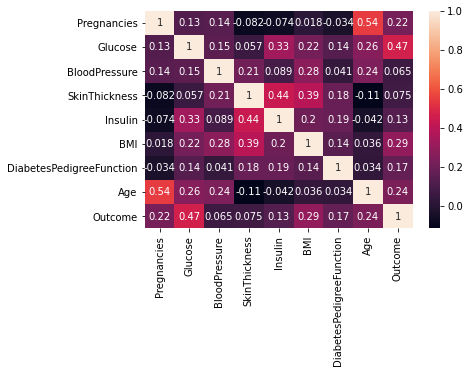

In [8]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
df_new = df

<h3> Data Cleaning </h3>

<strong> As we all know that the value of Glucose , Blood Pressure , Skin Thickness , Insulin, BMI cannot be zero So we change the value where 0 is present to Nan. And then we are replacing Nan value to their column's mean value. </strong>

In [10]:
df_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [11]:
df_new.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df_new["Glucose"].fillna(df_new["Glucose"].mean(), inplace = True)
df_new["BloodPressure"].fillna(df_new["BloodPressure"].mean(), inplace = True)
df_new["SkinThickness"].fillna(df_new["SkinThickness"].mean(), inplace = True)
df_new["Insulin"].fillna(df_new["Insulin"].mean(), inplace = True)
df_new["BMI"].fillna(df_new["BMI"].mean(), inplace = True)

<strong> describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types. </strong>

In [13]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


<strong> Here we are normalize the input features is the  the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively. <br> <br>
Why we are normalizing prior to model fitting?
<br> <br>
The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting. </strong>

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df_new = sc.fit_transform(df_new)

In [15]:
df_new = pd.DataFrame(df_new)

In [16]:
df_new

,0,1,2,3,4,5,6,7,8
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


<strong>Allocating Predictor and Target Values</strong>

In [17]:
X= df_new.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = df_new.iloc[:,-1 ].values

In [18]:
X

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

<h3>Train Test and Split </h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.3, random_state=11)

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
Y_train shape: (537,)
Y_test shape: (231,)


<h3>Logistic Regression</h3>

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train,Y_train)

LogisticRegression(random_state=42)

<h3> Plotting Graph for Knn

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


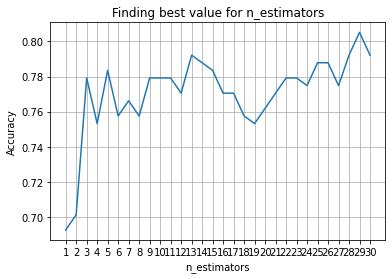

Highest value:  0.8051948051948052


In [22]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

<h3> K nearest neighbors Algorithm

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 29, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=29)

<h3> Support Vector Machine

In [24]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state = 42)
svc.fit(X_train , Y_train)

SVC(kernel='linear', random_state=42)

<h3> Naive Bayes

In [25]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

<h3> Decision Tree

In [26]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion='entropy' , random_state=42)
dectree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

<h3> Random Search

In [27]:
# randopm Search
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=42)
ranfor.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [28]:
#!pip install lightgbm

<h3> Light GBM Algo

In [29]:
import lightgbm as lgb
lgbClass = lgb.LGBMClassifier()
lgbClass.fit(X_train, Y_train)

LGBMClassifier()

In [30]:
#pip install xgboost

<h3> Xgboost Algorithm

In [31]:
from xgboost import XGBClassifier
xgClass = XGBClassifier()
xgClass.fit(X_train, Y_train)

XGBClassifier()

<h3> Doing Prediction with all the machine Learning Algorithm used

In [32]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
Y_Pred_lgm = lgbClass.predict(X_test)
Y_pred_xg= xgClass.predict(X_test)

<h3> Evaluating using accuracy_score

In [33]:

from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_lgm = accuracy_score(Y_test , Y_Pred_lgm)
accuracy_xg = accuracy_score(Y_test , Y_pred_xg)

<h3> Accuracy on test set

In [34]:
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))
print("Light GBM: " + str(accuracy_lgm * 100))
print("XgBoost: " + str(accuracy_xg * 100))

Logistic Regression: 77.92207792207793
K Nearest neighbors: 80.51948051948052
Support Vector Classifier: 77.48917748917748
Naive Bayes: 77.48917748917748
Decision tree: 72.2943722943723
Random Forest: 76.62337662337663
Light GBM: 76.19047619047619
XgBoost: 77.48917748917748


<strong> A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making. </strong>

In [35]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[138,  11],
       [ 34,  48]], dtype=int64)

<AxesSubplot:>

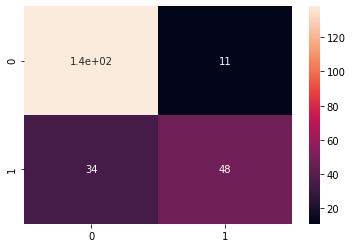

In [36]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

<strong> Now we will build classification report which is a key metrics in a classification problem.

You'll have precision, recall, f1-score and support for each class you're trying to find.

The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

The f1-score is the harmonic mean between precision & recall

The support is the number of occurence of the given class in your datas </strong>

In [37]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       149
         1.0       0.81      0.59      0.68        82

    accuracy                           0.81       231
   macro avg       0.81      0.76      0.77       231
weighted avg       0.81      0.81      0.80       231



<strong> Saving the best model and then Predicting using the best model </strong>

In [38]:
#import pickle

In [39]:
pickle.dump(knn, open('model_dia.pkl','wb'))
model = pickle.load(open('model_dia.pkl','rb'))
print(model.predict([[0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333]]))

[1.]


In [40]:
import joblib

In [41]:
# joblib.dump(knn,"model1")
